In [2]:
import json
import numpy as np
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from folium.features import CustomIcon

In [4]:
df = pd.read_csv('콜택시차고지현황_202203.csv')
df.head()

,차고지명,소재지,Latitude,Longitude,주차대수,유무료
0,개화산,강서구 방화동 845,37.572192,126.805159,20,무료
1,고척,구로구 고척로45길 39,37.505901,126.853182,10,유료
2,구파발,은평구 진관동 66-30,37.637967,126.919285,10,무료
3,남부여성(민),금천구 시흥4동 산139-2,37.463078,126.905934,12,유료
4,대림운동장,영등포구 대림3동 780,37.499611,126.894810,10,유료


- 서울시 지도 json 받아오기

In [ ]:
geo_str = json.load(open("skorea_municipalities_geo_simple.json", encoding = 'utf-8'))


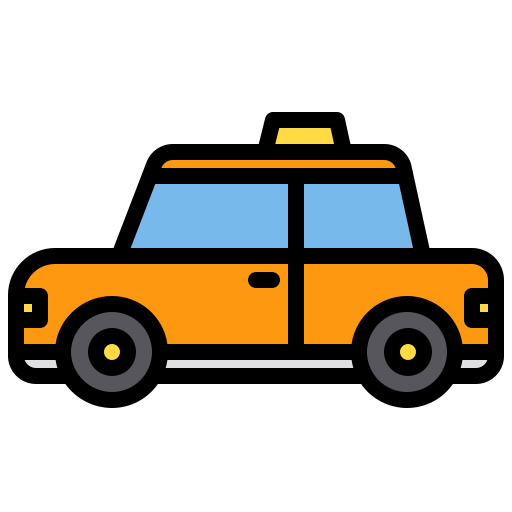
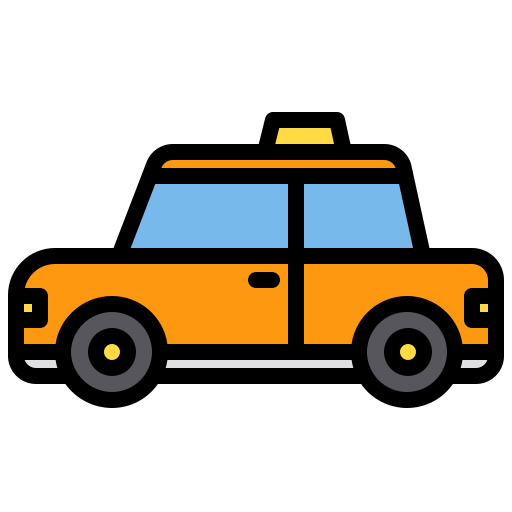
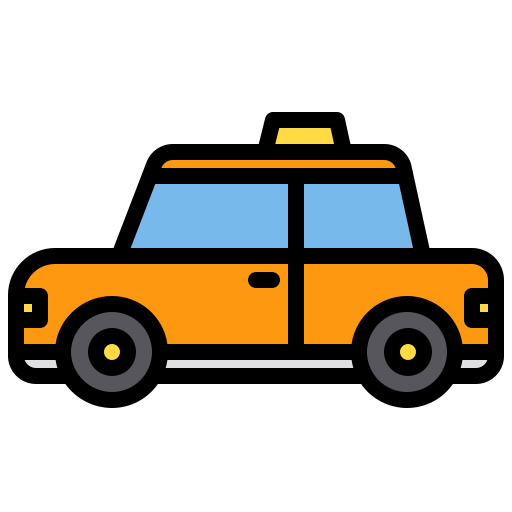
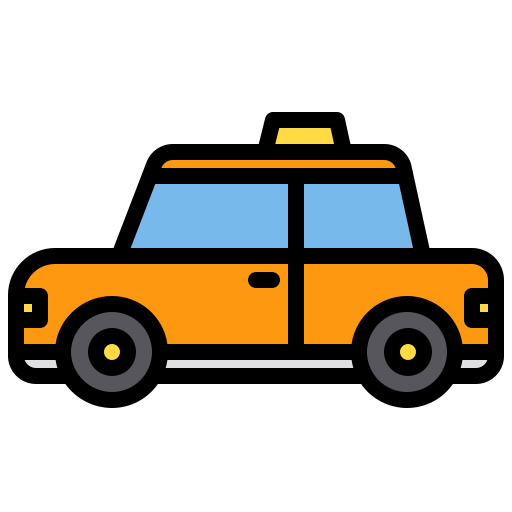
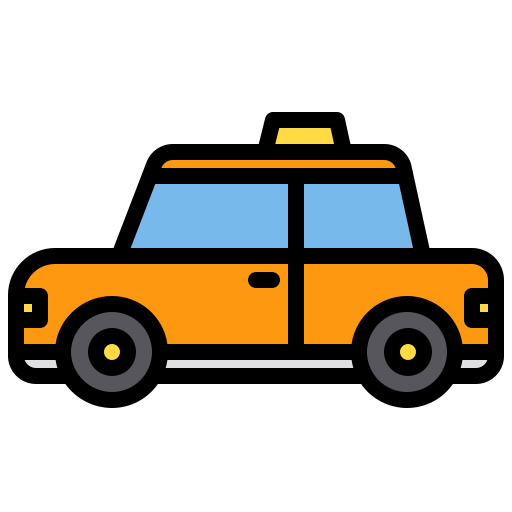
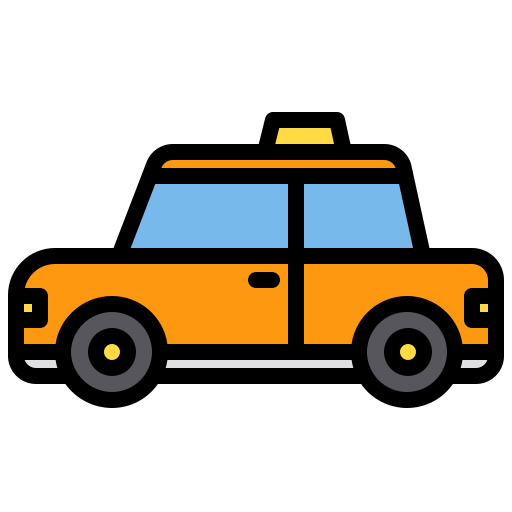
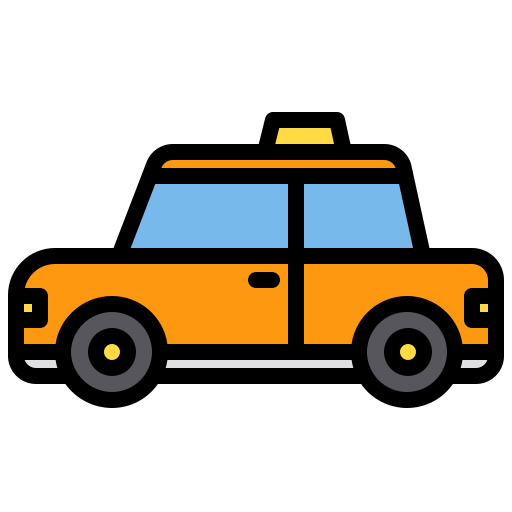
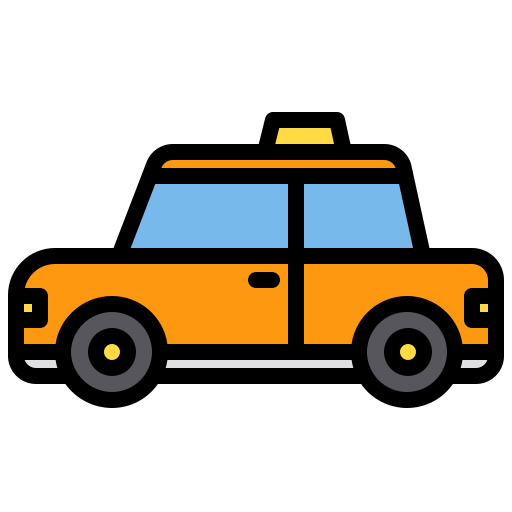
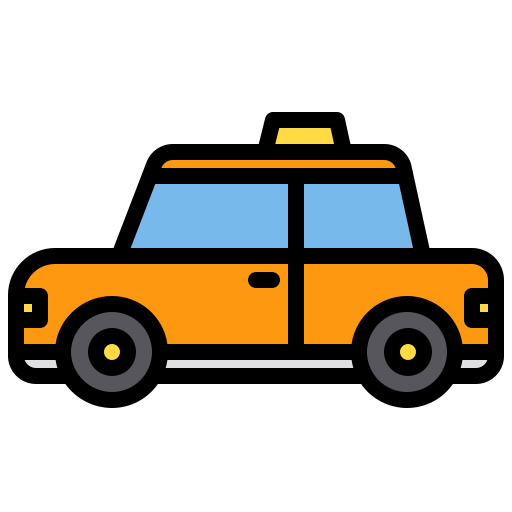
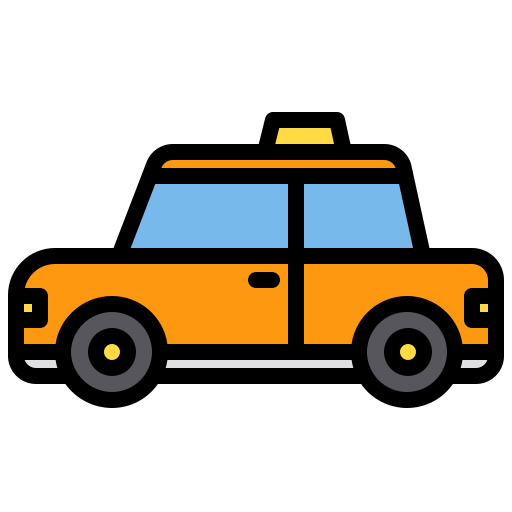
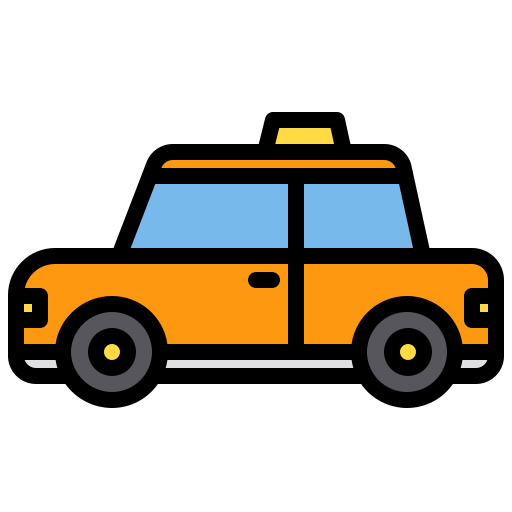
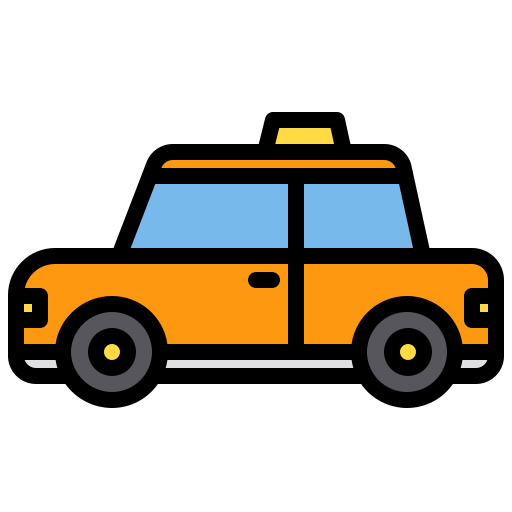
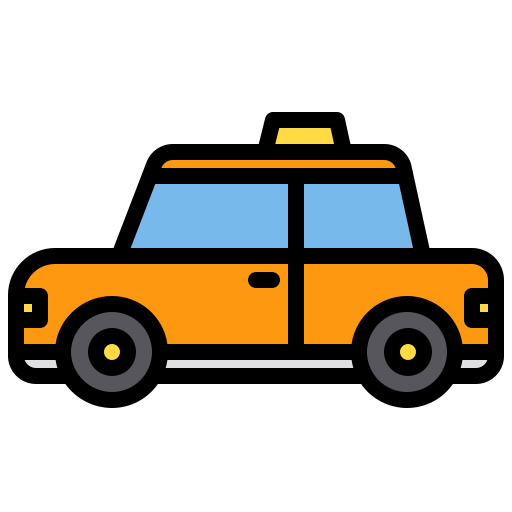
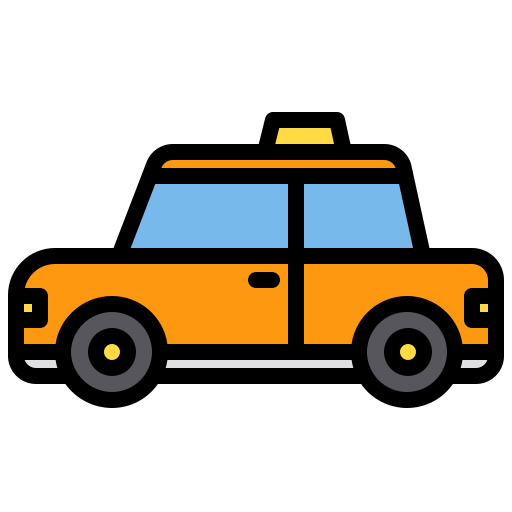
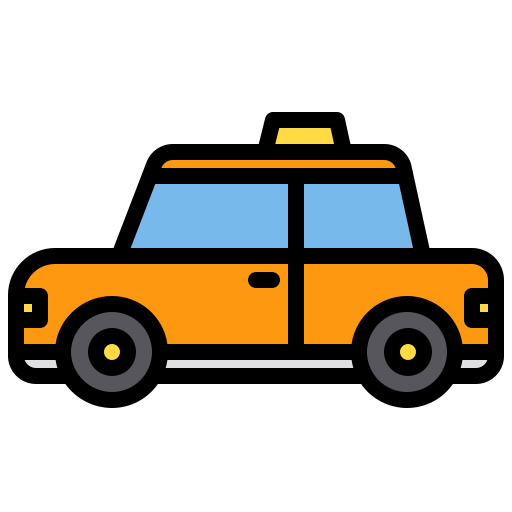
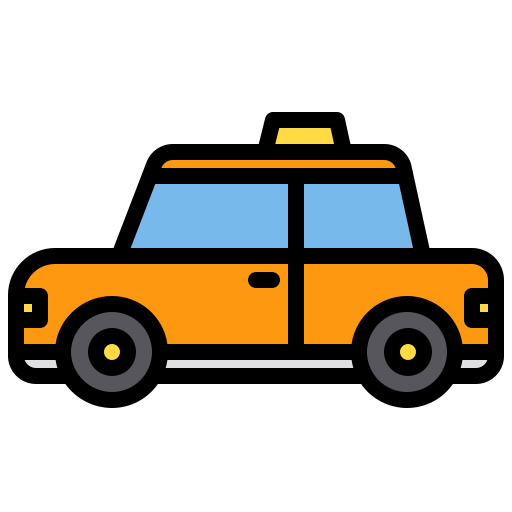
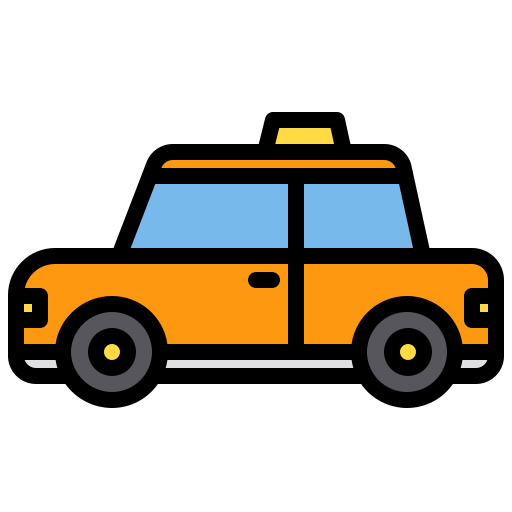
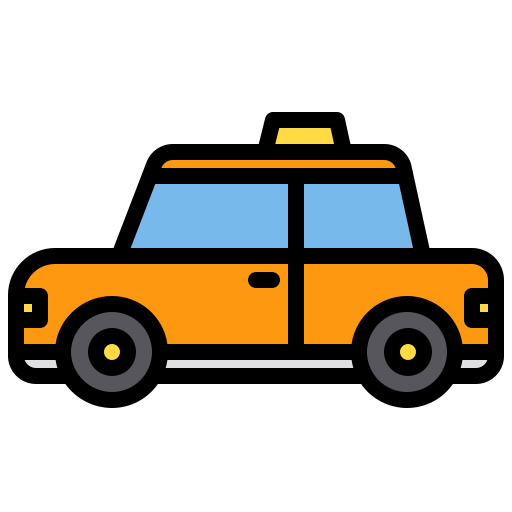
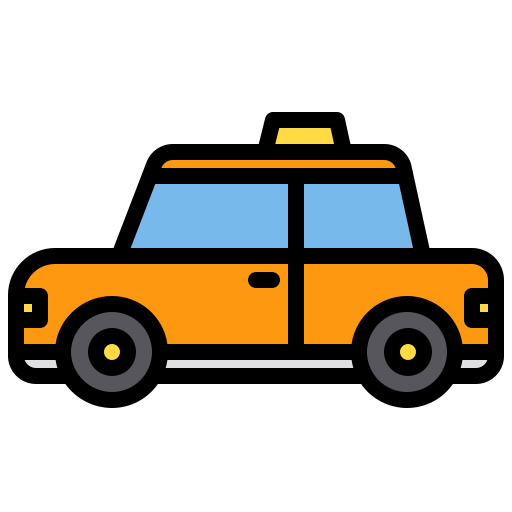
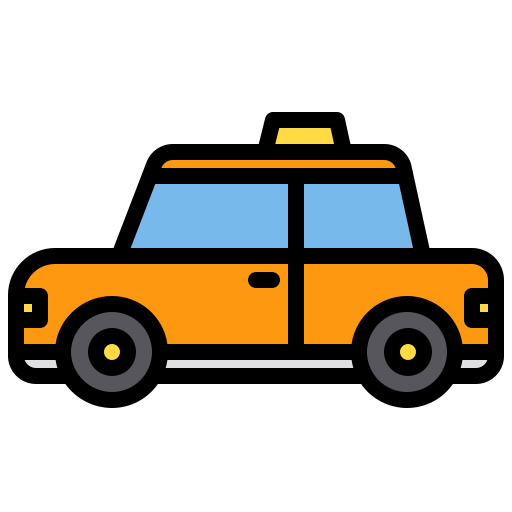
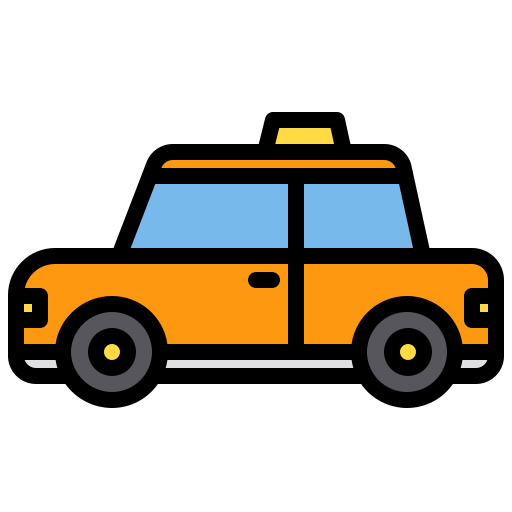
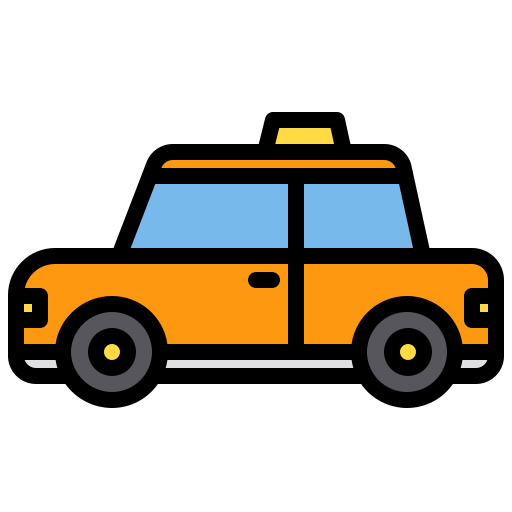
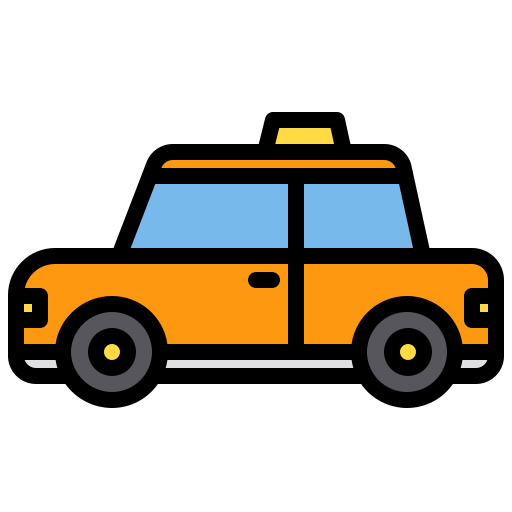
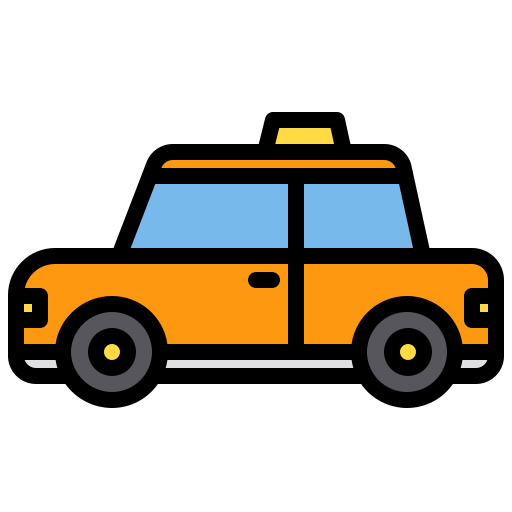
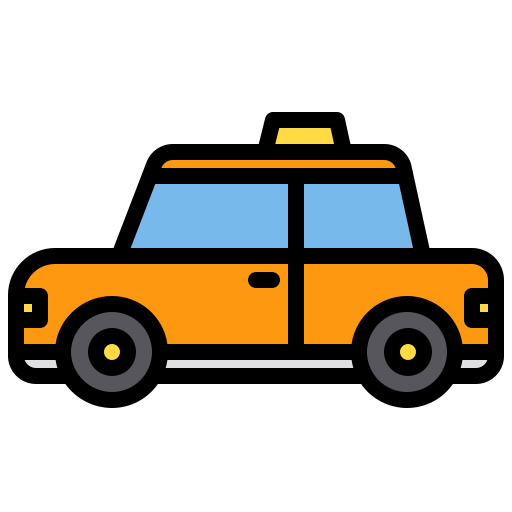
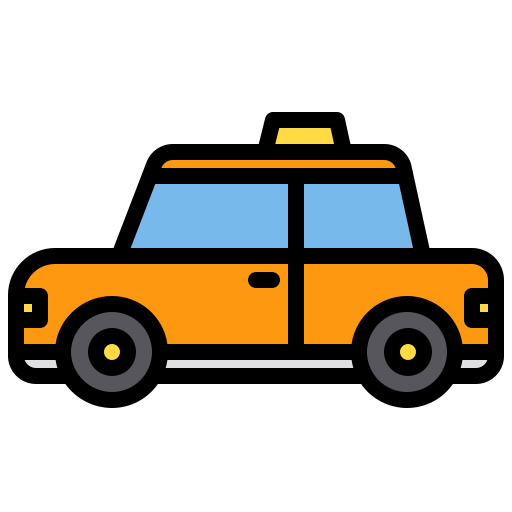
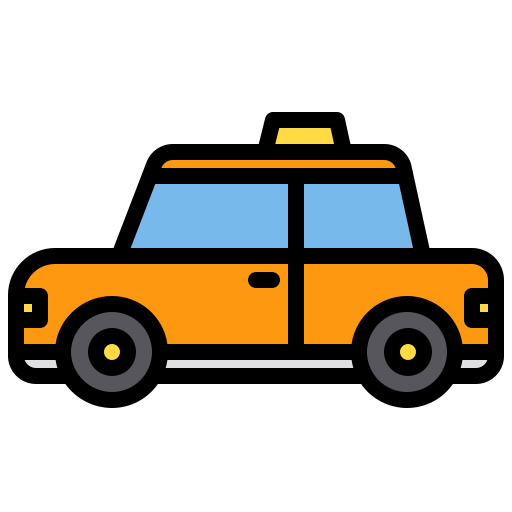
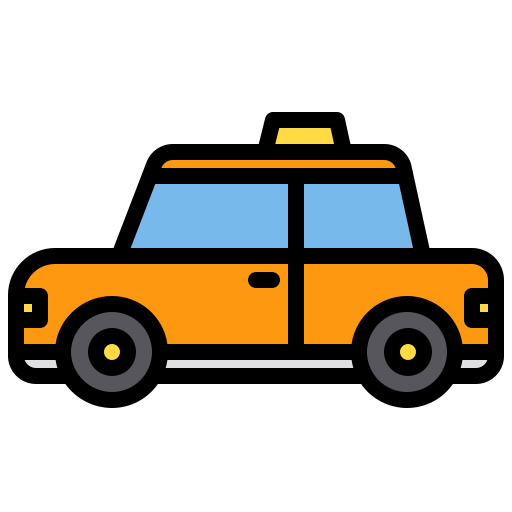
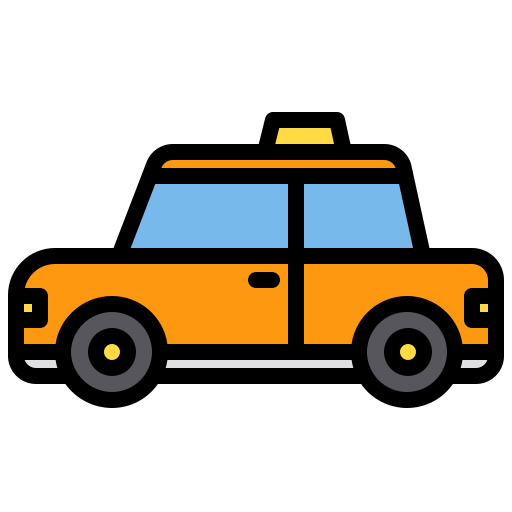
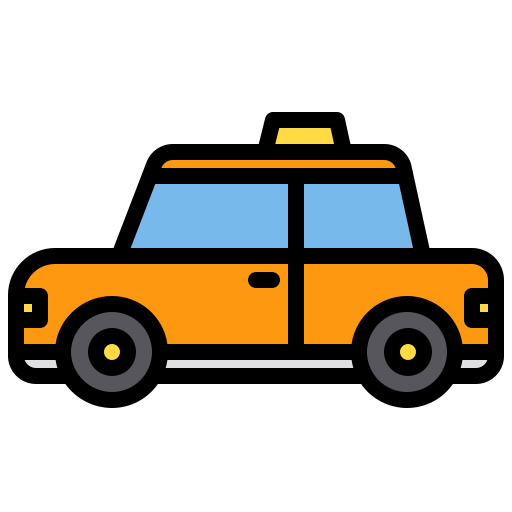
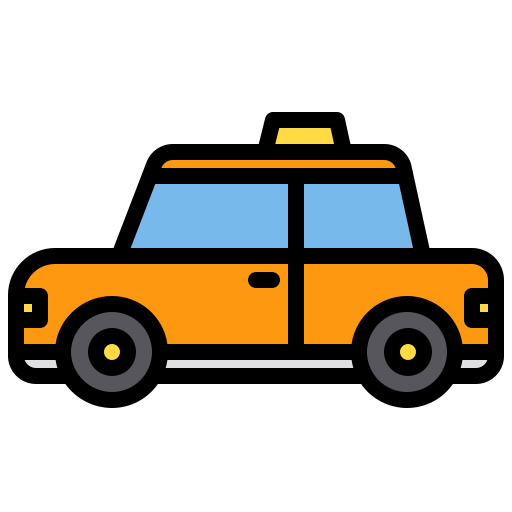
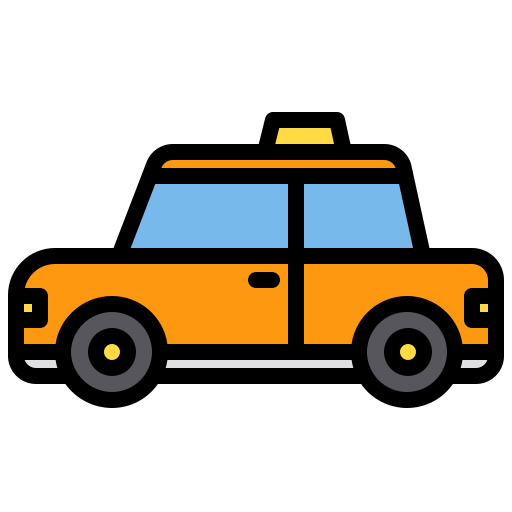
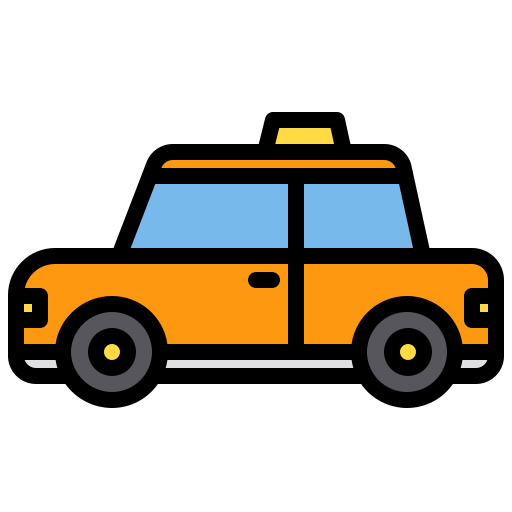
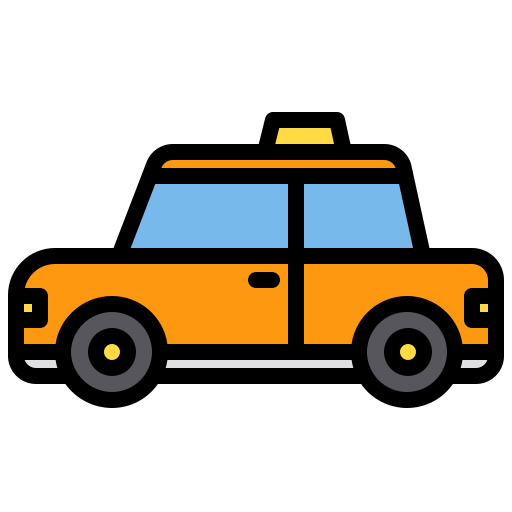
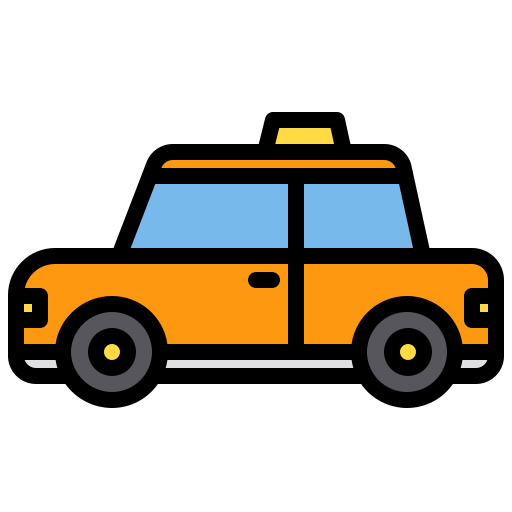
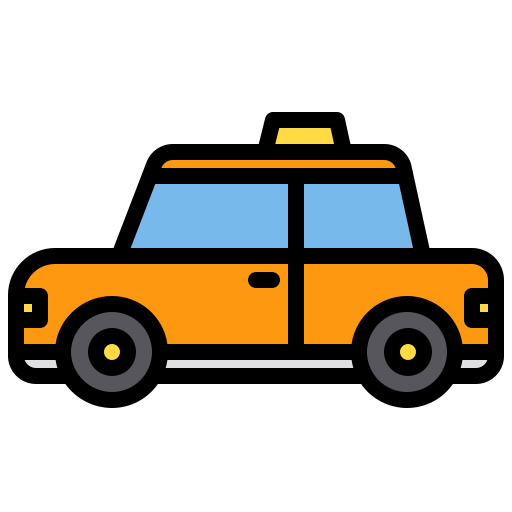
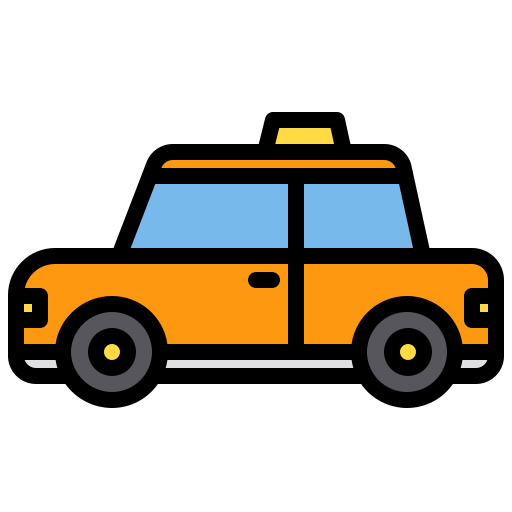
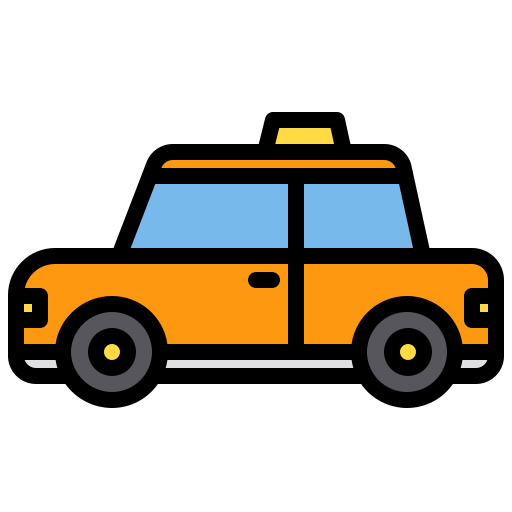
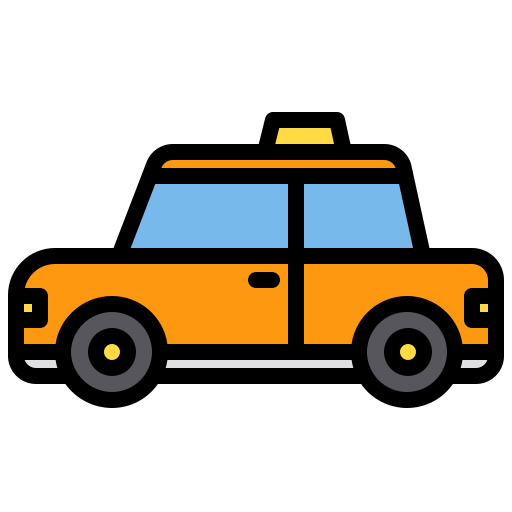
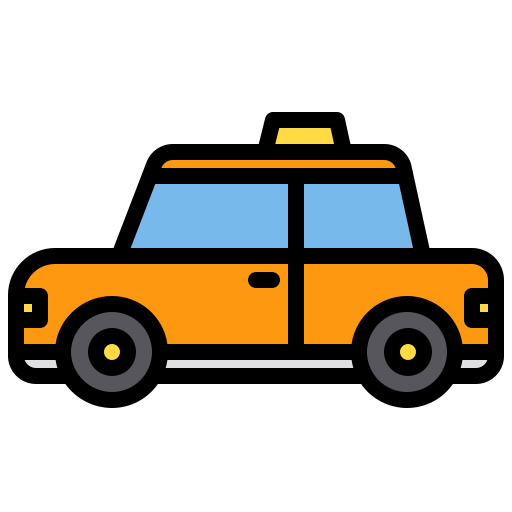

In [33]:
map = folium.Map(location = [37.5502, 126.982], zoom_start=11)
marker_cluster = MarkerCluster().add_to(map) 

for i in range(len(df)):
    icon1 = CustomIcon(
        '택시아이콘2.png',
        icon_size=(34,36)
    )
    folium.Marker(
        location = [df.loc[i,'Latitude'], df.loc[i,'Longitude']],
        icon = icon1,
        tooltip = df.loc[i, '차고지명']
        ).add_to(map)

    folium.Circle(location = [df.loc[i,'Latitude'], df.loc[i,'Longitude']], 
                radius = 1000, 
                fill_color = 'darkorange', color = 'darkorange').add_to(map)

def style_function(feature):
    default_style = {
        'opacity': 1,
        'fillColor': 'white',
        'color': 'darkred',
        'weight': 2.5
        }
    return default_style

folium.GeoJson(geo_str,style_function = style_function).add_to(map)

map

In [35]:
# 콜택시 수 총합
df.주차대수.sum()

634